In [1]:
import geopandas

import rasterio

In [2]:
# cliwoc = geopandas.read_file('./tif_in/ridgcrest2019b.tif')

In [3]:
# https://contextily.readthedocs.io/en/latest/working_with_local_files.html

In [4]:
%matplotlib inline

import numpy as np
import pandas as pd

import contextily as ctx
import geopandas
import rasterio
from rasterio.plot import show as rioshow
from shapely.geometry import box
import matplotlib.pyplot as plt

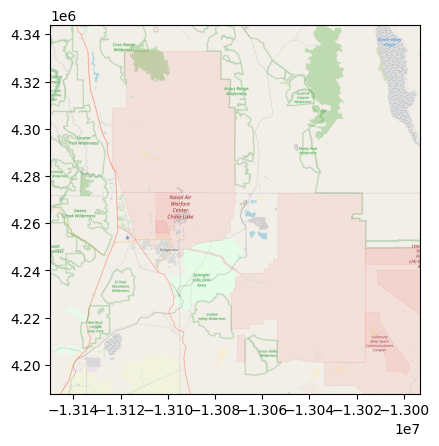

In [5]:
with rasterio.open("./tif_in/ridgcrest2019b.tif") as r:
    rioshow(r)
    rc_crs = r.crs

In [6]:
rc_crs

CRS.from_epsg(3857)

In [7]:
df = pd.read_csv('./csv_in/data_IrisObspy_Ridgecrest2019_2018TO5mar2023_20230305a.csv')

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

In [9]:
long = df['lon'].head(500).to_list()
lat = df['lat'].head(500).to_list()
print(len(long), len(lat))

500 500


In [10]:
geometry = [Point(xy) for xy in zip(long,lat)]

In [11]:
geo_df = []
geo_df = gpd.GeoDataFrame(geometry = geometry)
#geo_df = gpd.GeoDataFrame(geometry = geometry, 
#                          crs = rc_crs
#                         )

In [12]:
# https://stackoverflow.com/questions/63644131/how-to-use-geopandas-to-plot-latitude-and-longitude-on-a-more-detailed-map-with

In [13]:
#geo_df.crs = {'init':"epsg(3857)"}
geo_df.crs = {'init':"epsg:3857"}
# geo_df.crs = {'init':"epsg(3857)"}

C:\Users\m85302\AppData\Roaming\Python\Python310\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [18]:
geo_df.crs.to_string()

'EPSG:3857'

In [20]:
# https://stackoverflow.com/questions/63644131/how-to-use-geopandas-to-plot-latitude-and-longitude-on-a-more-detailed-map-with

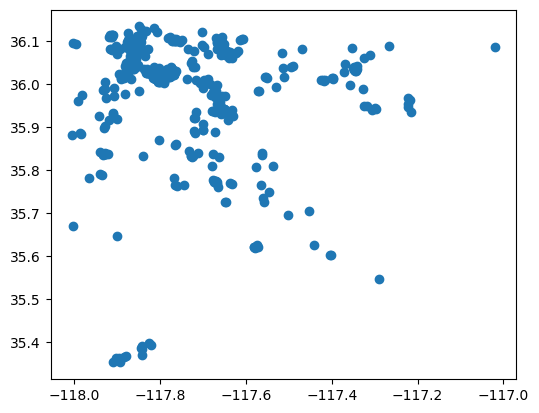

In [19]:
ax = geo_df.plot() # this works !

#ctx.add_basemap(ax, 
#                #crs = rc_crs,
#                source='./tif_in/ridgcrest2019b.tif')

#ctx.add_basemap(ax,
#                crs=geo_df.crs.to_string(),
#                source='./tif_in/ridgcrest2019b.tif'
#               )



In [22]:
# db = geopandas.read_file('./tif_in/ridgcrest2019b.tif')

In [23]:
# https://stackoverflow.com/questions/64589390/python-georasters-geotiff-image-into-geopandas-dataframe-or-pandas-dataframe
# You can also do it by xarray or rioxarray library.

In [24]:
import rioxarray as rxr
import xarray as xr

In [27]:
dataarray = rxr.open_rasterio('./tif_in/ridgcrest2019b.tif')
#dataarray = xr.open_rasterio('file.tif')
#dataarray = xr.open_rasterio('./tif_in/ridgcrest2019b.tif')

In [28]:
df = dataarray[0].to_pandas()

In [29]:
df

x,-1.314961e+07,-1.314946e+07,-1.314931e+07,-1.314916e+07,-1.314900e+07,-1.314885e+07,-1.314870e+07,-1.314854e+07,-1.314839e+07,-1.314824e+07,...,-1.299460e+07,-1.299445e+07,-1.299429e+07,-1.299414e+07,-1.299399e+07,-1.299384e+07,-1.299368e+07,-1.299353e+07,-1.299338e+07,-1.299322e+07
y,,,,,,,,,,,,,,,,,,,,,
4.344069e+06,242,242,242,242,242,242,242,242,224,229,...,242,242,242,242,242,242,242,242,242,242
4.343916e+06,242,242,242,242,242,242,242,242,202,216,...,242,242,242,242,242,242,242,242,242,242
4.343763e+06,242,242,242,242,242,242,242,242,227,237,...,242,242,242,242,242,242,242,242,242,242
4.343611e+06,242,242,242,242,242,242,242,242,242,224,...,242,242,242,242,242,242,242,242,242,242
4.343458e+06,224,237,232,242,242,242,242,242,242,216,...,242,242,242,242,242,242,242,242,242,242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.188291e+06,241,241,241,241,241,241,241,241,241,241,...,243,242,243,242,243,243,243,243,243,242
4.188138e+06,241,241,241,241,241,241,241,241,241,241,...,242,243,242,243,243,243,243,243,242,243
4.187985e+06,241,241,241,241,241,241,241,241,241,241,...,243,242,243,243,243,243,243,242,243,242


### Older code below

In [ ]:
# https://contextily.readthedocs.io/en/latest/intro_guide.html

In [ ]:
import contextily as cx

In [ ]:
data_url = "https://ndownloader.figshare.com/files/20232174"
db = geopandas.read_file(data_url)

In [ ]:
ax = db.plot(color="red", figsize=(9, 9))
# cx.add_basemap(ax, crs=db.crs.to_string()) # proxy crash (can I fix these?)

### my data

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('./csv_in/data_IrisObspy_Ridgecrest2019_2018TO5mar2023_20230305a.csv')

In [ ]:
print(df.shape)
display(df.head())
display(df.tail())

https://contextily.readthedocs.io/en/latest/working_with_local_files.html   

  
Now, we can use add_basemap to add a local raster file as the background to our map. Simply replace a web source for the path to the local file, and you’ll be set!

In [ ]:
plt.figure()
plt.plot(df['lon'], df['lat'],'.');

In [ ]:
#plt.figure()
#ax = plt.plot(df['lon'], df['lat'],'.');
#ctx.add_basemap(ax,source='./tif_in/ridgcrest2019b.tif')

In [ ]:
# https://stackoverflow.com/questions/63644131/how-to-use-geopandas-to-plot-latitude-and-longitude-on-a-more-detailed-map-with

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

In [ ]:
long = df['lon'].head(500).to_list()
lat = df['lat'].head(500).to_list()
print(len(long), len(lat))

In [ ]:
geometry = [Point(xy) for xy in zip(long,lat)]

In [ ]:
geo_df = gpd.GeoDataFrame(geometry = geometry)

In [ ]:
ax = geo_df.plot()
ctx.add_basemap(ax, source='./tif_in/ridgcrest2019b.tif')